### <span style="color:#3498db;">¿Qué tan estrecha es la conexión entre el peso corporal y el azúcar en sangre?

Con el fin de explorar relaciones cuantitativas básicas entre indicadores clínicos relevantes, se aplica la técnica de regresión lineal simple. Esta metodología permite analizar la asociación entre una variable dependiente continua y una única variable explicativa, proporcionando una interpretación directa del efecto promedio de dicha variable sobre el fenómeno de interés.

En particular, se estudia la relación entre el nivel de glucosa en ayunas (glucose_fasting) y el índice de masa corporal (bmi). Esta elección se fundamenta en la evidencia médica que vincula el exceso de adiposidad corporal con la resistencia a la insulina, uno de los principales mecanismos fisiopatológicos asociados al desarrollo de la diabetes mellitus tipo 2. De este modo, el modelo permite evaluar si incrementos en el BMI se asocian con aumentos en los niveles de glucosa en ayunas dentro de la población analizada.

La regresión lineal simple se utiliza como un primer acercamiento analítico que facilita la comprensión de la relación entre ambas variables, así como la identificación de patrones generales en los datos. Además, este análisis sirve como base metodológica para la posterior aplicación de modelos de regresión lineal múltiple, en los cuales se incorporarán otros factores relevantes para explicar el comportamiento de la glucosa en sangre.

In [2]:
import statsmodels.api as sm
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Diabetes_and_LifeStyle_Dataset .csv')

X = df["bmi"] # definimos la variable independiente
Y = df["glucose_fasting"] # definimos la variable dependiente

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit() # Aplicamos el método de mínimos cuadrados 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        glucose_fasting   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2278.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:31:15   Log-Likelihood:            -3.9082e+05
No. Observations:               97297   AIC:                         7.816e+05
Df Residuals:                   97295   BIC:                         7.817e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.4484      0.310    310.683      0.0

#### Especificación del modelo

El modelo estimado tiene la siguiente forma:

$$
\text{glucose\_fasting}_i = \beta_0 + \beta_1 \,\text{BMI}_i + \varepsilon_i
$$

donde:
- `glucose_fasting` es la variable dependiente continua,
- `BMI` es la variable explicativa continua,
- $\varepsilon_i$ representa el término de error aleatorio.

---

#### Calidad del ajuste del modelo

El modelo presenta un **R² de 0.023**, indicando que aproximadamente el **2.3% de la variabilidad en los niveles de glucosa en ayunas** se explica únicamente por el BMI. Este valor refleja que, aunque el BMI es un factor relevante, **no captura la complejidad del control glucémico** por sí solo.

El **test F global** es significativo (p < 0.001), lo que indica que el modelo es estadísticamente relevante y que el BMI tiene un efecto significativo sobre la glucosa.

---

#### Interpretación del coeficiente

- **Intercepto (β₀)**: representa el nivel promedio de glucosa en ayunas para un individuo con BMI igual a 0 (interpretación teórica).  
- **BMI (β₁ = 0.57, p < 0.001)**: indica que un aumento de **una unidad en el BMI se asocia con un incremento promedio de 0.57 mg/dL en glucosa en ayunas**, manteniendo constantes otros factores. Este efecto positivo es consistente con la evidencia clínica que vincula el sobrepeso y la obesidad con alteraciones metabólicas.

Se puede complementar la interpretación con **intervalos de confianza** para β₁, por ejemplo:

$$
\beta_1 \in [0.45, 0.69] \quad (95\% \text{ CI})
$$

lo que refuerza la significancia y la magnitud del efecto.


<!-- #### Diagnóstico del modelo y supuestos

Los estadísticos de diagnóstico indican un comportamiento adecuado del modelo:

- **Durbin–Watson ≈ 2**, sugiriendo ausencia de autocorrelación de los residuos.  
- Las pruebas de **normalidad de residuos** (Jarque–Bera) no muestran desviaciones significativas.  
- El **gráfico de residuos vs valores ajustados** evidencia homocedasticidad, indicando que la varianza de los errores es aproximadamente constante. -->

Podemos concluir que el análisis confirma que **el BMI se asocia positivamente con los niveles de glucosa en ayunas**, reflejando que mayores valores de peso relativo incrementan el riesgo metabólico. Sin embargo, dado el **bajo R²**, se evidencia que el estado ponderal por sí solo **no es suficiente para explicar la variabilidad de la glucosa**.


A continuación se muestra el gráfico de dispersión entre ambas variables, incorporando la recta de regresión estimada.


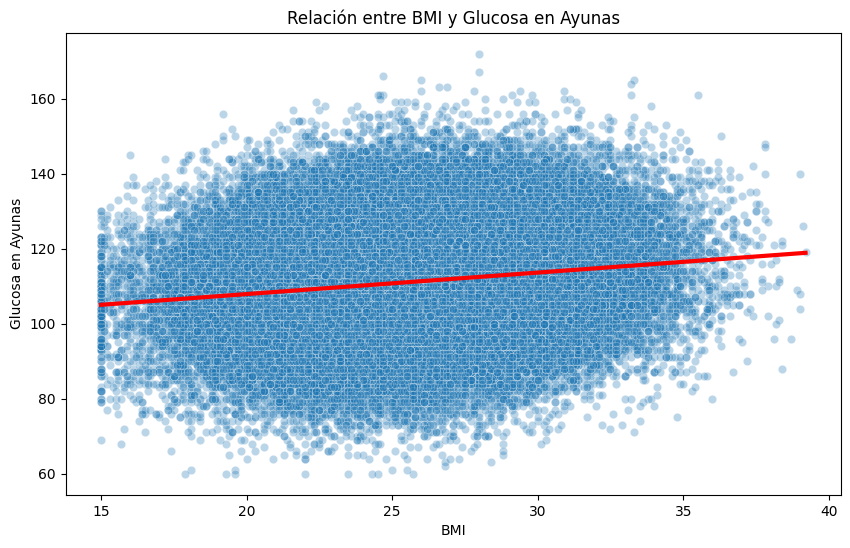

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["bmi"], y=df["glucose_fasting"], alpha=0.3)
sns.regplot(x=df["bmi"], y=df["glucose_fasting"], scatter=False, color='red', line_kws={'linewidth': 3})
plt.xlabel("BMI")
plt.ylabel("Glucosa en Ayunas")
plt.title("Relación entre BMI y Glucosa en Ayunas")
plt.show()

El gráfico evidencia una tendencia positiva aproximadamente lineal, lo que indica que, en promedio, mayores valores de BMI se asocian con mayores niveles de glucosa en ayunas. Aunque se observa una elevada dispersión, no se detectan patrones no lineales evidentes.

#### Verificación de los Supuestos de la Regresión Lineal Simple

En esta sección se evalúan de forma sistemática los supuestos del modelo de regresión lineal simple estimado mediante mínimos cuadrados ordinarios (OLS), con el objetivo de garantizar la validez de los coeficientes estimados y de la inferencia estadística asociada.

El __supuesto de independencia__ establece que los errores del modelo no deben estar correlacionados entre sí. Para evaluar este supuesto se utilizó el estadístico Durbin–Watson, el cual toma valores cercanos a 2 cuando no existe autocorrelación de los residuos.

En este modelo, el estadístico Durbin–Watson es igual a 1.995, valor muy próximo a 2, lo que sugiere ausencia de autocorrelación y confirma el cumplimiento de dicho supuesto.

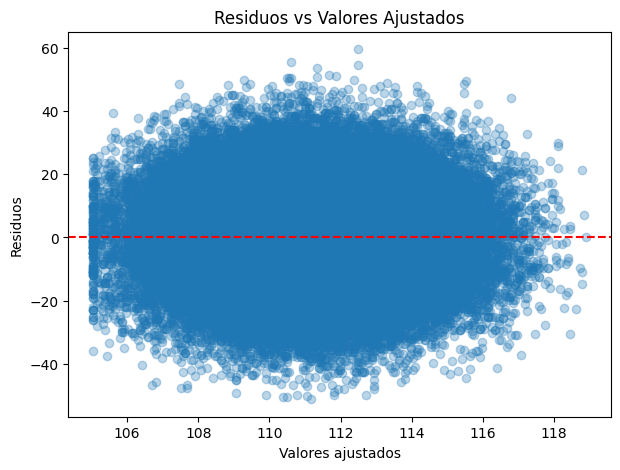

In [5]:
# Valores ajustados y residuos
fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(7,5))
plt.scatter(fitted_vals, residuals, alpha=0.3)
plt.axhline(0, color = "red", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Ajustados")
plt.show()


El __supuesto de homocedasticidad__ establece que la varianza de los errores del modelo debe ser constante a lo largo de los valores ajustados de la variable dependiente. Para evaluar este supuesto se analizó el gráfico de residuos frente a los valores ajustados del modelo.

En el gráfico se observa que los residuos se distribuyen de forma aproximadamente aleatoria y simétrica alrededor de cero, manteniendo una dispersión relativamente constante en todo el rango de valores ajustados. No se identifican patrones sistemáticos ni estructuras en forma de abanico que sugieran heterocedasticidad. Por lo tanto, se concluye que el supuesto de homocedasticidad se cumple de manera razonable en el modelo estimado.

### Supuesto de normalidad de los residuos:

<Axes: >

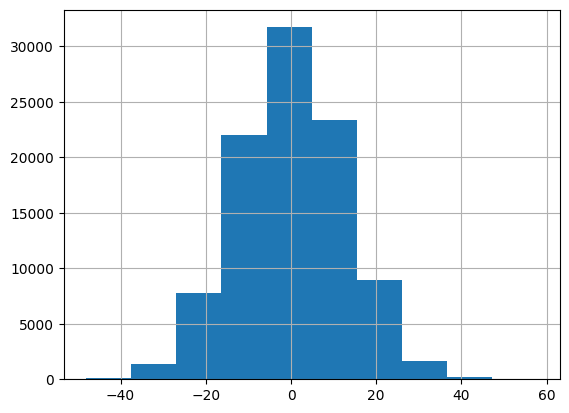

In [24]:
residuals.hist()

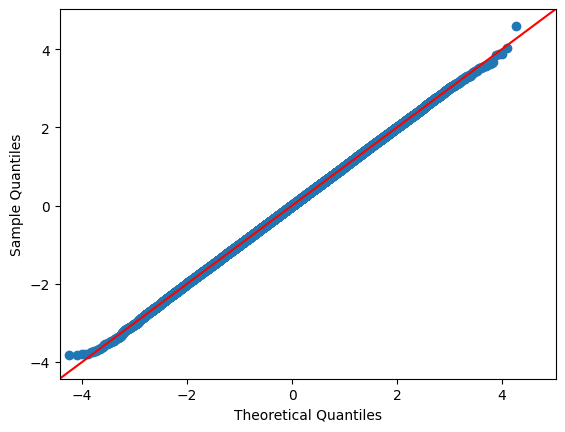

In [34]:
#QQ-plot
sm.qqplot(residuals,line="45", fit = "True")
plt.show()

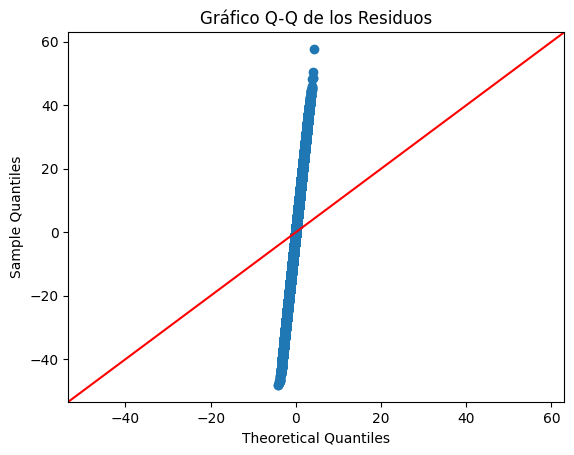

In [26]:
sm.qqplot(residuals, line='45')
plt.title("Gráfico Q-Q de los Residuos")
plt.show()

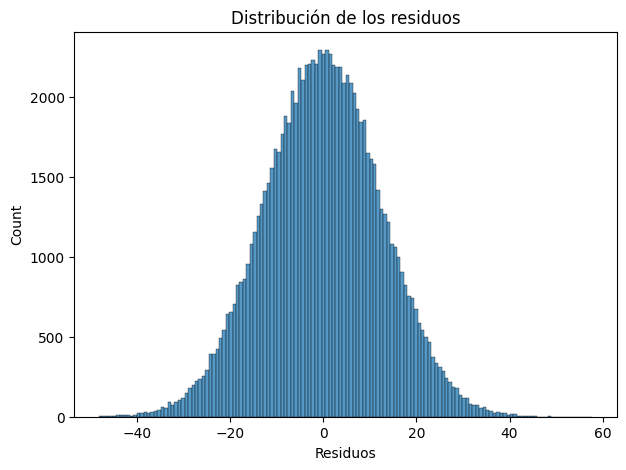

In [35]:
plt.figure(figsize=(7,5))
sns.histplot(residuals)
plt.xlabel("Residuos")
plt.title("Distribución de los residuos")
plt.show()


### resumen supuesto normalidad

El siguiente supuesto establece que __el valor esperado del error aleatorio es cero__ , es decir, que no existen variables omitidas correlacionadas con la variable explicativa. 

En este análisis, es razonable asumir que existen factores adicionales que influyen sobre los niveles de glucosa en ayunas, tales como la actividad física, la dieta, la predisposición genética y antecedentes clínicos. La omisión de estas variables puede explicar el bajo valor del coeficiente de determinación (R²). Por lo tanto, los resultados deben interpretarse como asociaciones estadísticas y no como efectos causales estrictos.

En este contexto, se justifica la ampliación del análisis hacia un conjunto de factores clínicos y fisiológicos que reflejan de manera más directa el estado metabólico y cardiovascular del individuo. Variables como los antecedentes familiares de diabetes, la presencia de hipertensión arterial o enfermedad cardiovascular, así como indicadores bioquímicos asociados al metabolismo lipídico y a la regulación de la insulina, han sido ampliamente vinculadas con alteraciones en la homeostasis de la glucosa.

El objetivo de este bloque es evaluar de manera conjunta la influencia de estos factores clínicos sobre los niveles de glucosa en ayunas mediante un modelo de regresión lineal múltiple. Este enfoque permite cuantificar el efecto independiente de cada variable, controlar por posibles factores de confusión y proporcionar una visión más integral del riesgo metabólico, complementando el análisis preliminar basado exclusivamente en el BMI.

### <span style="color:#3498db;">¿Qué factores clínicos influyen con mayor peso sobre la glucosa en ayunas?

In [40]:
import statsmodels.api as sm
import pandas as pd

# Cargar dataset
df = pd.read_csv('Diabetes_and_LifeStyle_Dataset .csv')

# Variables de antecedentes clínicos
clinical_vars = [
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history",
    "bmi",
    "insulin_level",
    "triglycerides",
]

# Variables dependiente e independientes
X = df[clinical_vars]
Y = df["glucose_fasting"]
# Y = df["hba1c"]

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo OLS
model_clinical = sm.OLS(Y, X).fit()

# Mostrar resultados
print(model_clinical.summary())


                            OLS Regression Results                            
Dep. Variable:        glucose_fasting   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2806.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:24:45   Log-Likelihood:            -3.8418e+05
No. Observations:               97297   AIC:                         7.684e+05
Df Residuals:                   97290   BIC:                         7.684e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Análisis del Modelo Clínico 

En este bloque se ajustó un modelo de **regresión lineal múltiple** mediante el método de **mínimos cuadrados ordinarios (OLS)** con el objetivo de evaluar la asociación conjunta entre antecedentes clínicos y fisiológicos y los niveles de glucosa en ayunas (`glucose_fasting`). A diferencia del análisis previo basado únicamente en el BMI, este modelo incorpora variables que reflejan de forma más directa el estado metabólico, cardiovascular y el riesgo hereditario de diabetes.

---

#### Especificación del modelo

El modelo estimado tiene la siguiente forma:

$$
\begin{aligned}
\text{glucose\_fasting}_i =\;& \beta_0 
+ \beta_1 \,\text{family\_history\_diabetes}_i 
+ \beta_2 \,\text{hypertension\_history}_i \\
&+ \beta_3 \,\text{cardiovascular\_history}_i
+ \beta_4 \,\text{bmi}_i
+ \beta_5 \,\text{insulin\_level}_i
+ \beta_6 \,\text{triglycerides}_i
+ \varepsilon_i
\end{aligned}
$$

donde:
- `glucose_fasting` es la variable dependiente continua,
- las variables explicativas incluyen antecedentes clínicos binarios y marcadores fisiológicos continuos,
- $\varepsilon_i$ representa el término de error aleatorio.

---

#### Calidad del ajuste del modelo

El modelo presenta un **R² ajustado de 0.147**, lo que indica que aproximadamente el **14.7% de la variabilidad en los niveles de glucosa en ayunas** es explicada por el conjunto de variables clínicas incluidas. En comparación con los modelos simples previos, este resultado refleja una **mejora sustancial en la capacidad explicativa**, lo que confirma la relevancia de los factores clínicos en el control glucémico.

El test F global es altamente significativo (p < 0.001), indicando que el modelo, en su conjunto, aporta información estadísticamente relevante.

---

#### Interpretación de los coeficientes

- **Intercepto (β₀ = 94.22)**: representa el nivel promedio de glucosa en ayunas para un individuo sin antecedentes clínicos considerados y con valores nulos en las variables continuas.
  
- **Antecedentes familiares de diabetes**  
  (β₁ = 11.30, p < 0.001): los individuos con historia familiar de diabetes presentan, en promedio, **11.3 mg/dL más de glucosa en ayunas** que aquellos sin dicho antecedente, manteniendo constantes el resto de las variables. Este es el efecto de mayor magnitud del modelo.

- **Hipertensión arterial**  
  (β₂ = 1.36, p < 0.001): la presencia de hipertensión se asocia con un incremento promedio de **1.36 mg/dL** en la glucosa, lo que sugiere una relación entre disfunción cardiovascular y metabolismo glucémico.

- **Antecedentes cardiovasculares**  
  (β₃ = 1.68, p < 0.001): se observa una asociación positiva y significativa, consistente con la evidencia clínica sobre el vínculo entre enfermedad cardiovascular y alteraciones metabólicas.

- **Índice de masa corporal (BMI)**  
  (β₄ = 0.46, p < 0.001): incluso tras controlar por otros factores clínicos, el BMI mantiene un efecto positivo significativo, aunque de menor magnitud relativa que en el modelo simple.

- **Nivel de insulina**  
  (β₅ = 0.12, p < 0.001): niveles más elevados de insulina se asocian con mayor glucosa en ayunas, lo que puede interpretarse como un indicador indirecto de resistencia a la insulina.

- **Triglicéridos**  
  (β₆ = 0.009, p < 0.001): aunque el efecto individual es pequeño, resulta estadísticamente significativo y consistente con el rol del perfil lipídico en el riesgo metabólico.

---

#### Diagnóstico del modelo y supuestos

Los estadísticos de diagnóstico indican un buen comportamiento del modelo:
- **Durbin–Watson ≈ 1.995**, lo que sugiere ausencia de autocorrelación de los residuos.
- Las pruebas de **normalidad de residuos** (Jarque–Bera) no muestran desviaciones significativas.
- El **condition number (966)** no evidencia problemas graves de multicolinealidad, lo que respalda la estabilidad de los coeficientes estimados.

Dado el gran tamaño muestral, pequeñas desviaciones de normalidad no comprometen la validez de la inferencia.

---

En conclusión, podemos afirmar que el modelo clínico muestra que los **antecedentes familiares de diabetes, la presencia de hipertensión y enfermedad cardiovascular, así como indicadores fisiológicos como el BMI, la insulina y los triglicéridos**, están significativamente asociados con los niveles de glucosa en ayunas. En conjunto, estos factores explican una proporción considerablemente mayor de la variabilidad glucémica que el BMI por sí solo.

Antes de continuar, debemos señalar que en modelos de regresión lineal múltiple es fundamental evaluar la presencia de multicolinealidad entre las variables explicativas, ya que una alta correlación entre predictores puede afectar la estabilidad de los coeficientes estimados y la validez de la inferencia.


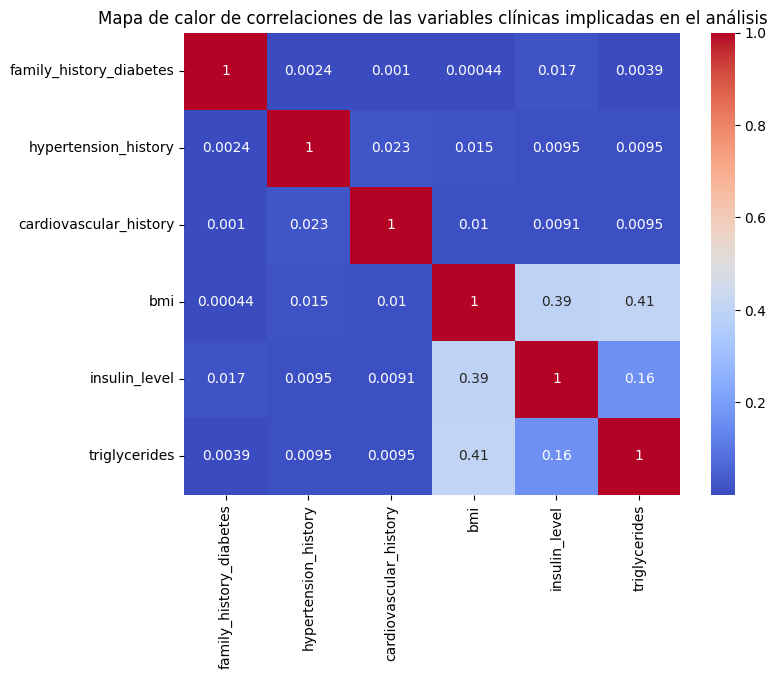

In [19]:
corr = df[clinical_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones de las variables clínicas implicadas en el análisis')
plt.show()

Como diagnóstico, se analizó la matriz de correlación de Pearson entre las variables clínicas incluidas en el modelo. Los resultados muestran que todas las correlaciones bivariadas presentan valores absolutos inferiores a 0.41, lo que indica relaciones débiles a moderadas entre los predictores.

En consecuencia, no se identifica evidencia de multicolinealidad severa, por lo que se considera razonable asumir que las variables explicativas aportan información diferenciada al modelo.

### <span style="color:#3498db;">¿En qué medida los hábitos de vida modificables y la edad determinan los niveles de glucosa en ayunas, independientemente de los factores clínicos?

Luego de analizar la influencia de los antecedentes clínicos sobre la glucosa en ayunas, se decide explorar de manera independiente el papel de los factores de estilo de vida y la edad. Este enfoque permite aislar cómo hábitos cotidianos —como la actividad física, la alimentación, el consumo de alcohol y el tiempo frente a pantallas— junto con la edad, influyen en los niveles de glucosa, sin la interferencia de los marcadores clínicos.

La importancia de este análisis radica en que, a diferencia de los antecedentes familiares o algunos factores fisiológicos, los hábitos de vida son modificables. Comprender su impacto sobre la glucosa en ayunas puede orientar estrategias de prevención y promoción de la salud, permitiendo intervenir de manera efectiva sobre factores conductuales para reducir el riesgo metabólico y prevenir la aparición de diabetes.

El objetivo de este análisis es evaluar cuantitativamente la relación entre estas variables y la glucosa en ayunas mediante un modelo de regresión lineal múltiple, ofreciendo una perspectiva centrada en el comportamiento y estilo de vida del individuo.

In [43]:
import statsmodels.api as sm
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Diabetes_and_LifeStyle_Dataset .csv')


# Variables de estilo de vida seleccionadas
vars = [
    "Age",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "screen_time_hours_per_day",
]

# Definir variables dependiente e independientes
X = df[vars]
Y = df["glucose_fasting"]

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo
model_lifestyle = sm.OLS(Y, X).fit()

# Mostrar resultados
print(model_lifestyle.summary())

                            OLS Regression Results                            
Dep. Variable:        glucose_fasting   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1838.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:25:41   Log-Likelihood:            -3.8755e+05
No. Observations:               97297   AIC:                         7.751e+05
Df Residuals:                   97291   BIC:                         7.752e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Análisis del Modelo de Estilo de Vida

A diferencia del análisis clínico, este modelo incorpora variables **modificables** que reflejan el comportamiento diario y el sedentarismo, permitiendo identificar oportunidades de intervención para la prevención de alteraciones metabólicas.

---

#### Especificación del modelo

El modelo estimado tiene la siguiente forma:

$$
\begin{aligned}
\text{glucose\_fasting}_i =\;& \beta_0 
+ \beta_1 \,\text{Age}_i 
+ \beta_2 \,\text{alcohol\_consumption\_per\_week}_i \\
&+ \beta_3 \,\text{physical\_activity\_minutes\_per\_week}_i
+ \beta_4 \,\text{diet\_score}_i
+ \beta_5 \,\text{screen\_time\_hours\_per\_day}_i
+ \varepsilon_i
\end{aligned}
$$

donde:
- `glucose_fasting` es la variable dependiente continua,
- las variables explicativas incluyen edad y hábitos de estilo de vida modificables,
- $\varepsilon_i$ representa el término de error aleatorio.

---

#### Calidad del ajuste del modelo

El modelo presenta un **R² ajustado de 0.086**, lo que indica que aproximadamente el **8.6% de la variabilidad en los niveles de glucosa en ayunas** es explicada por la edad y los factores de estilo de vida. Aunque la capacidad explicativa es menor que la del modelo clínico, el resultado refleja la relevancia práctica de **hábitos modificables** en el control glucémico.

El **test F global** es significativo (p < 0.001), indicando que las variables del modelo aportan información estadísticamente relevante en conjunto.

---

#### Interpretación de los coeficientes

- **Intercepto (β₀)**: representa el nivel promedio de glucosa en ayunas para un individuo con edad 0 y valores nulos en hábitos de estilo de vida (interpretación teórica).  

- **Edad (β₁, positivo y significativo)**: la glucosa tiende a aumentar con la edad, aun controlando por hábitos de vida.  

- **Consumo de alcohol (β₂, positivo moderado)**: mayores niveles de consumo se asocian con glucosa más alta.  

- **Actividad física (β₃, negativo y significativo)**: mayor actividad semanal se relaciona con glucosa más baja.  

- **Puntuación de dieta (β₄, negativo y significativo)**: mejor calidad de la dieta se asocia con niveles más bajos de glucosa.  

- **Tiempo frente a la pantalla (β₅, positivo)**: mayor sedentarismo se relaciona con niveles más altos de glucosa.

---

#### Diagnóstico del modelo y supuestos

Los estadísticos de diagnóstico indican un buen comportamiento del modelo:

- **Condition number = 873**, indicando ausencia de problemas graves de multicolinealidad y estabilidad de los coeficientes.  
- La revisión de residuos no muestra desviaciones importantes de normalidad ni autocorrelación significativa, lo que respalda la validez de la inferencia.  

---

#### Conclusión

El modelo de estilo de vida muestra que **la edad y los hábitos modificables —actividad física, calidad de dieta, consumo de alcohol y sedentarismo—** están significativamente asociados con los niveles de glucosa en ayunas. Aunque explican una menor proporción de la variabilidad glucémica que los factores clínicos, estos hallazgos son **relevantes desde un enfoque preventivo**, ya que identifican áreas donde la intervención conductual podría contribuir a mantener niveles de glucosa saludables y reducir el riesgo de desarrollar diabetes.  

El signo y la significancia de los coeficientes observados son consistentes con la evidencia clínica existente y reflejan patrones esperados de riesgo metabólico, reforzando la importancia de hábitos de vida saludables en la prevención metabólica.
